# Random Walk Generation

$$\frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma \sqrt{dt} \xi_t$$

In [3]:
import pandas as pd
import numpy as np

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [8]:
p = gbm(10, n_scenarios=3)

In [9]:
p.shape

(120, 3)

In [10]:
p.head()

,0,1,2
0,99.833094,99.108257,107.918152
1,98.763137,107.359783,107.687726
2,101.872569,107.343399,106.284445
3,100.162033,102.306061,100.657687
4,96.655678,104.861576,106.751853


<AxesSubplot:>

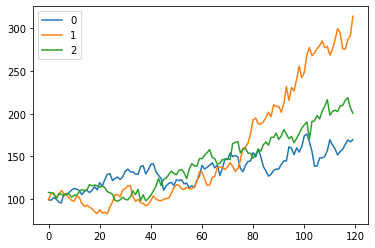

In [11]:
p.plot()

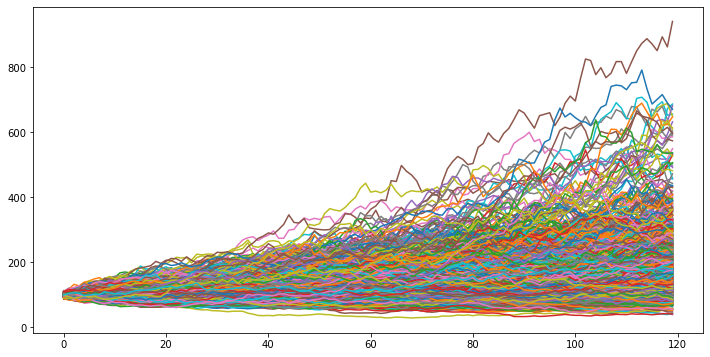

In [12]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [13]:
p = gbm(n_years=10, n_scenarios=1000)

In [14]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [15]:
%timeit gbm0(n_years=5, n_scenarios=1000)

2.04 ms ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit gbm1(n_years=5, n_scenarios=1000)

1.83 ms ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<AxesSubplot:>

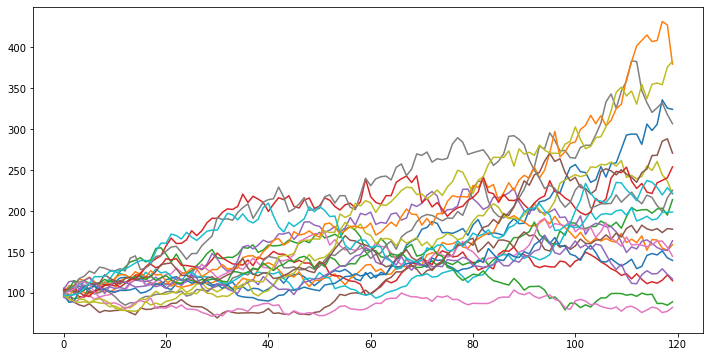

In [17]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [18]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps+1, n_scenarios))
    rets_plus_1[0] = 1
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

<AxesSubplot:>

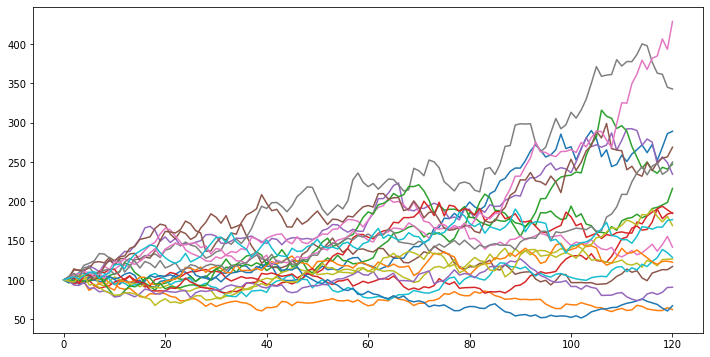

In [19]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [21]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,91.864874,106.446544,103.168157,104.876790,93.628806,100.230159,105.261923,104.852038,95.577165,97.657141
2,101.482605,104.351208,100.531391,113.009423,96.762486,104.953562,106.198628,112.152547,95.446606,101.407740
3,103.683100,102.826210,103.811796,117.124582,84.225753,105.339631,106.975862,116.877398,92.507591,101.304681
4,116.163881,107.358242,101.211211,121.408259,82.348195,104.921671,106.544877,120.831249,98.743984,98.348401
